In [1]:
import matplotlib.pyplot as plt
import json
import numpy
from scipy.signal import find_peaks, peak_widths, lfilter, lfilter_zi, filtfilt, butter

In [2]:
def smooth_without_delay(xn, butter_ord, butter_crit_freq):
    # Butterworth filter
    b, a = butter(butter_ord, butter_crit_freq)
    # Apply the filter to xn.  Use lfilter_zi to choose the initial condition
    # of the filter.
    zi = lfilter_zi(b, a)
    z, _ = lfilter(b, a, xn, zi=zi*xn[0])
    # Apply the filter again, to have a result filtered at an order
    # the same as filtfilt.
    z2, _ = lfilter(b, a, z, zi=zi*z[0])
    # Use filtfilt to apply the filter.
    return filtfilt(b, a, xn)

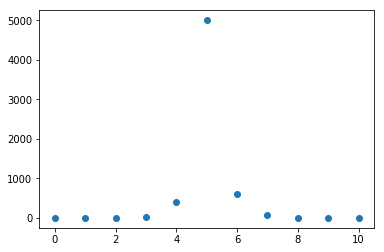

In [5]:
iaot = numpy.array([0, 1, 2, 30, 400, 5000, 600, 70, 8, 9, 10])
plt.scatter([i for i in range(len(iaot))], iaot)

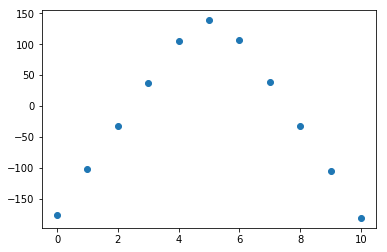

In [6]:
smooth_iaot = smooth_without_delay(iaot, butter_ord=1, butter_crit_freq=0.05)
plt.scatter([i for i in range(len(smooth_iaot))], smooth_iaot)